In [1]:
###
# Idea for pretty art from images. 
# image is gaussian blurred into a potential, 
#lines emerge from edges and are attracted to the image basin. Lines per channel 

In [19]:
import os
from math import sqrt, pow, cos, sin, pi
import copy, pickle, random

import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate

import imageio
from PIL import Image
import svgwrite

from lineifiers import * 
%matplotlib inline

In [24]:
files = os.listdir('/Users/johnparkhill/Little_Projects/art_for_lines')

In [34]:
rootdir = '/Users/johnparkhill/Little_Projects/art_for_lines/'
im_arrays=[]
for X in files: 
    if X.count("jpg")>0: 
        with open(rootdir+X,'rb') as f: 
            im_arrays.append(imageio.imread(f))

In [35]:
files

['download.jpeg',
 'stalkerII.svg',
 '.DS_Store',
 'bob_le_flambeur-900.jpg',
 '81E3dK1i3-L._SL1500_.jpg',
 'dodge.jpeg',
 'stalker-1979-002-00m-ln4-dog-running-through-water_0.jpg',
 '2046-zhangziyi-feature-1600x900-c-default.jpg',
 'gokudo-kyofu-dai-gekijo-gozu-german-dvd-movie-cover.jpg',
 '23405756_1890470151282571_8743520120236682996_o.jpg',
 'HBeG5.jpg',
 'e62edc39b7fafd0edf295b833bbcc5a3.jpg',
 'worstdays.jpg',
 'chin.jpg',
 'images-w1400.jpg',
 'LDurieux_Conversation_Var_Sm_1024x1024.png',
 'jobbetter.jpg',
 'palaceoffinearts.jpg',
 'tJaeWoH1UJPyeIU2yd9YJgeghFC.jpg',
 'challenger-vanishing-point-ranch.jpg',
 'otto-e-mezzo-8-1-2-movie-fellini-eleven.png',
 'python_polargraph',
 '2046.jpg',
 'bettertomorrow.jpg',
 'img_1298.jpg',
 'tumblr_mm7nxgTLy61s8dmv9o5_1280.png']

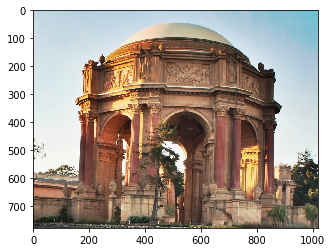

In [36]:
img = im_arrays[-6]
plt.imshow(img)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


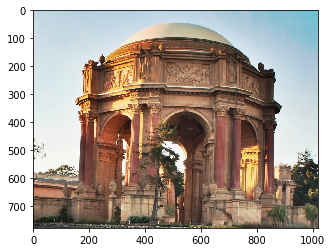

In [37]:
x = np.linspace(0,img.shape[0],img.shape[0])
y = np.linspace(0,img.shape[1],img.shape[1])
#
# 2x oversample the image since we'll dither it. 
#
oversamp = 1.0
xnew = np.linspace(0, img.shape[0], img.shape[0]*oversamp)
ynew = np.linspace(0, img.shape[1], img.shape[1]*oversamp)
rc = interpolate.interp2d(x, y, img[:,:,0].flatten(), kind='linear')
gc = interpolate.interp2d(x, y, img[:,:,1].flatten(), kind='linear')
bc = interpolate.interp2d(x, y, img[:,:,2].flatten(), kind='linear')
rgb_new = np.stack([rc(xnew.flatten(), ynew.flatten()),
                    gc(xnew.flatten(), ynew.flatten()),
                    bc(xnew.flatten(), ynew.flatten())],-1).transpose(1,0,2).astype(np.uint8)
plt.imshow(rgb_new)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


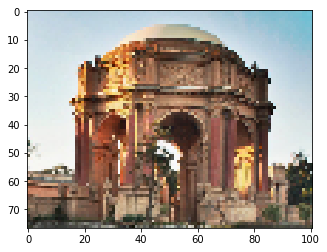

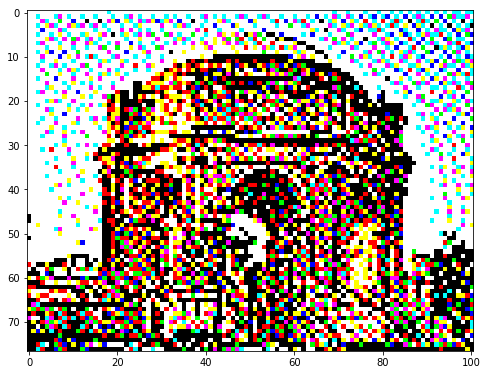

In [41]:
x = np.linspace(0,img.shape[0],img.shape[0])
y = np.linspace(0,img.shape[1],img.shape[1])
#
# 2x oversample the image since we'll dither it. 
#
oversamp = 0.1
xnew = np.linspace(0, img.shape[0], img.shape[0]*oversamp)
ynew = np.linspace(0, img.shape[1], img.shape[1]*oversamp)
rc = interpolate.interp2d(x, y, img[:,:,0].flatten(), kind='linear')
gc = interpolate.interp2d(x, y, img[:,:,1].flatten(), kind='linear')
bc = interpolate.interp2d(x, y, img[:,:,2].flatten(), kind='linear')
rgb_new = np.stack([rc(xnew.flatten(), ynew.flatten()),
                    gc(xnew.flatten(), ynew.flatten()),
                    bc(xnew.flatten(), ynew.flatten())],-1).transpose(1,0,2).astype(np.uint8)
plt.imshow(rgb_new)
# cymk_new = rgb_to_cymk(rgb_new)
dith_r = floyd_steinberg(rgb_new)
plt.figure(figsize=(8,10))
plt.imshow((255*dith_r).astype(np.uint8))

In [42]:
dithered = floyd_steinberg(rgb_new)
# Because the dithered output is already between 0,1
cymk_new = rgb_to_cmyk(dithered, RGB_SCALE=1.)
c_lines, y_lines, m_lines, k_lines = random_ngon_linify(cymk_new, n_max=5,r_max = 1.5)
cymk_lines = [c_lines, y_lines, m_lines, k_lines]
write_svg(k_lines, "bw_lines.svg", scale=10.)
cymk_to_svg(cymk_lines,scale=5.)

In [43]:
with open("palace.pkl",'wb') as f: 
    pickle.dump(cymk_lines,f)

In [10]:
with open("palace.pkl",'wb') as f: 
    pickle.dump(k_lines,f)

In [11]:
with open("img.pkl",'rb') as f: 
    X=pickle.load(f)
write_svg(X)

In [ ]:
# Check the SVG before plotting it out. 
write_svg([P])

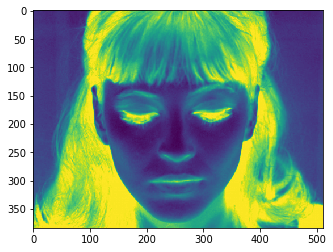

(384, 511)


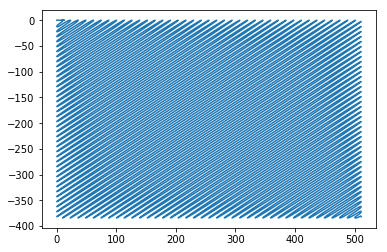

[511. 384.]
(125200, 2)


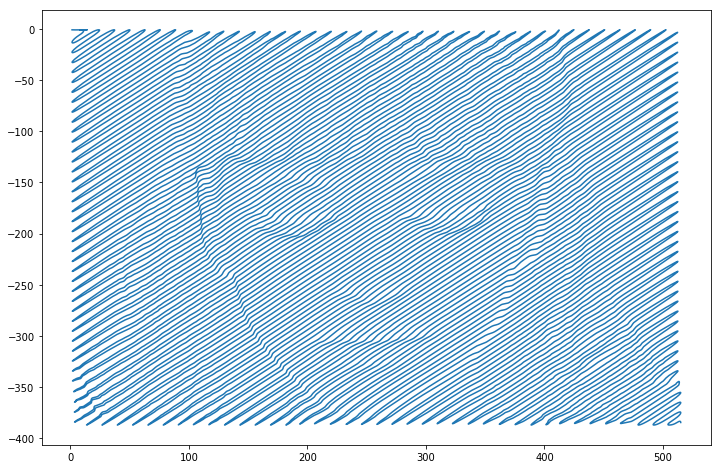

In [414]:
img = rgb_to_cmyk(rgb_new, RGB_SCALE=255.)[:,:,-1]
plt.imshow(img)
plt.show()
print(img.shape)
y = np.linspace(0, img.shape[0], img.shape[0])
x = np.linspace(0, img.shape[1], img.shape[1])
F = interpolate.interp2d(y, x, img.flatten(), kind='linear')
sharp_wiggle = wiggle_fill((0,img.shape[1]), (0,img.shape[0]), nwiggle=80)
# plt.plot(np.array(sharp_wiggle)[:,0],-1*np.array(sharp_wiggle)[:,1])
# plt.show()
list_wiggle=np.array(sharp_wiggle).reshape(-1,2)
wiggle = smooth_path(list_wiggle)
plt.plot(np.array(wiggle)[:,0],-1*np.array(wiggle)[:,1])
plt.show()
print(np.array(wiggle).max(0))
new_path = smooth_path(np.array(path_channel_distort(wiggle, F)).reshape(-1,2),window=4)
P = np.array(new_path).reshape(-1,2)
print(P.shape)
plt.figure(figsize=(12,8))
plt.plot(P[:,0],-1*P[:,1])
# plt.plot(P[:,1]-P[:,1].min(),-1*P[:,0]+P[:,0].max())
plt.show()

In [368]:
# Check the SVG before plotting it out. 
write_svg([P])

In [371]:
with open("jobbetter.pkl",'rb') as f: 
    X=pickle.load(f)
write_svg(X)

In [370]:
with open("jobbetter.pkl",'wb') as f: 
    pickle.dump([P],f)

In [49]:
cymk_to_svg(cymk_lines,scale=5.)

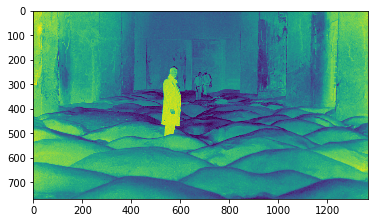

In [56]:
cymk = rgb_to_cmyk(img)
plt.imshow(cymk[:,:,-1])

In [463]:
cymk = rgb_to_cmyk(img)
# cc = interpolate.interp2d(x, y, cymk[:,:,0].flatten(), kind='linear')
# yc = interpolate.interp2d(x, y, cymk[:,:,1].flatten(), kind='linear')
# mc = interpolate.interp2d(x, y, cymk[:,:,2].flatten(), kind='linear')
x = np.linspace(0,img.shape[0],img.shape[0])
y = np.linspace(0,img.shape[1],img.shape[1])
kc = interpolate.interp2d(x, y, cymk[:,:,3].flatten(), kind='linear')
# c_lines = grid_lineify(cc, x_lim=(0, img.shape[0]), y_lim=(0, img.shape[1]),ntraj = 1000)
# y_lines = grid_lineify(yc, x_lim=(0, img.shape[0]), y_lim=(0, img.shape[1]),ntraj = 500)
# m_lines = grid_lineify(mc, x_lim=(0, img.shape[0]), y_lim=(0, img.shape[1]),ntraj = 1000)
k_lines = grid_lineify(kc, x_lim=(0, img.shape[0]), y_lim=(0, img.shape[1]), 
            ntraj = 1500, 
            max_step = 4000, gamma = 0.08, dt = 9., e0 = 0.03, 
            T = 0.1, e_thresh = 0.006, h = 2e-1, m = 6, bounce = False)

NameError: name 'grid_lineify' is not defined

In [61]:
with open("stalkerII",'wb') as f: 
    pickle.dump(k_lines,f)

In [60]:
write_svg(k_lines, scale=3.0)

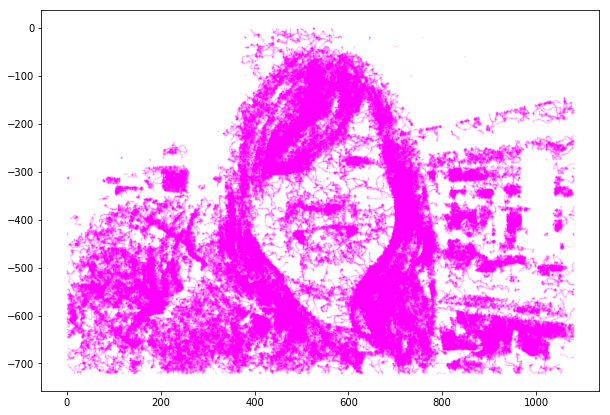

In [1117]:
plt.figure(figsize=(10,7))
# for line in c_lines: 
#     if (len(line)<1):
#         continue 
#     t1 = np.array(line)
#     _ = plt.scatter(t1[:,1], -t1[:,0], s=1,alpha=0.5, color='cyan')
# for line in y_lines: 
#     if (len(line)<1):
#         continue 
#     t1 = np.array(line)
#     _ = plt.scatter(t1[:,1], -t1[:,0], s=1,alpha=0.5, color='yellow')
# for line in m_lines: 
#     if (len(line)<1):
#         continue 
#     t1 = np.array(line)
#     _ = plt.scatter(t1[:,1], -t1[:,0], s=1,alpha=0.5, color='magenta')
for line in k_lines: 
    if (len(line)<1):
        continue 
    t1 = np.array(line)
    _ = plt.scatter(t1[:,1], -t1[:,0], s=1,alpha=0.1, color='black')    
plt.show()

In [190]:
pl = Plotter()

Initializing I2C... 
Initializing pen...
Move pen to start and press ENTER.

Print area:  (2.0, 89.44) (2.0, 57.2)
Step Lengt:  0.15707963267948966
Min Resolu:  556.0  X  351.0
Line Files:
10 stalkerlines.pkl
--- Selection ---
10
Load Pen.
Initializing pen...
Move pen to start and press ENTER.

Data Bounds:  [0.021159459344625514, 0.004511756825272828, 802.9934998713557, 999.9992398531366]
Scaling Data....
Scaled Data. [23.779468102211165, 2.2759999999999962, 67.66053189778883, 56.92400000000001]
Planning  36  paths.
drawing...
Drawing  5  vertices 
took  7.434473276138306 s
Drawing  98  vertices 
took  3.4249379634857178 s
Drawing  83  vertices 
took  2.6103789806365967 s
Drawing  57  vertices 
took  1.49593186378479 s
Drawing  154  vertices 
took  4.452978849411011 s
Drawing  1274  vertices 
took  18.930482149124146 s
Drawing  1583  vertices 
took  19.24885392189026 s
Drawing  55  vertices 
took  1.838973045349121 s
Drawing  8  vertices 
took  1.1161220073699951 s
Drawing  342  verti

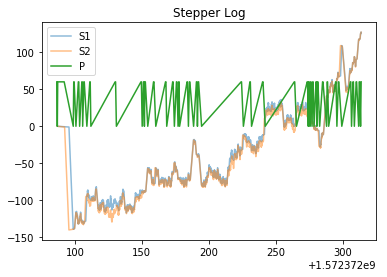

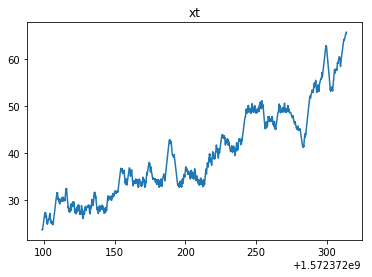

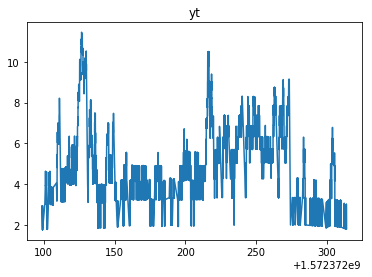

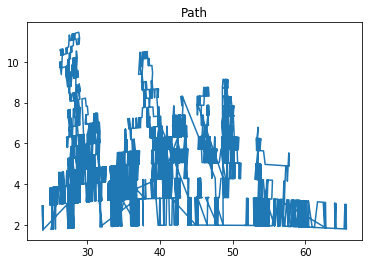

In [191]:
pl.plot_paths()